# Basic GUI

# Modify

# Random Forest model

Best Model Accuracy for Random Forest :  0.9601555281798583
Classification Report for Random Forest :
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     14568
           1       0.97      0.94      0.95     11408

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



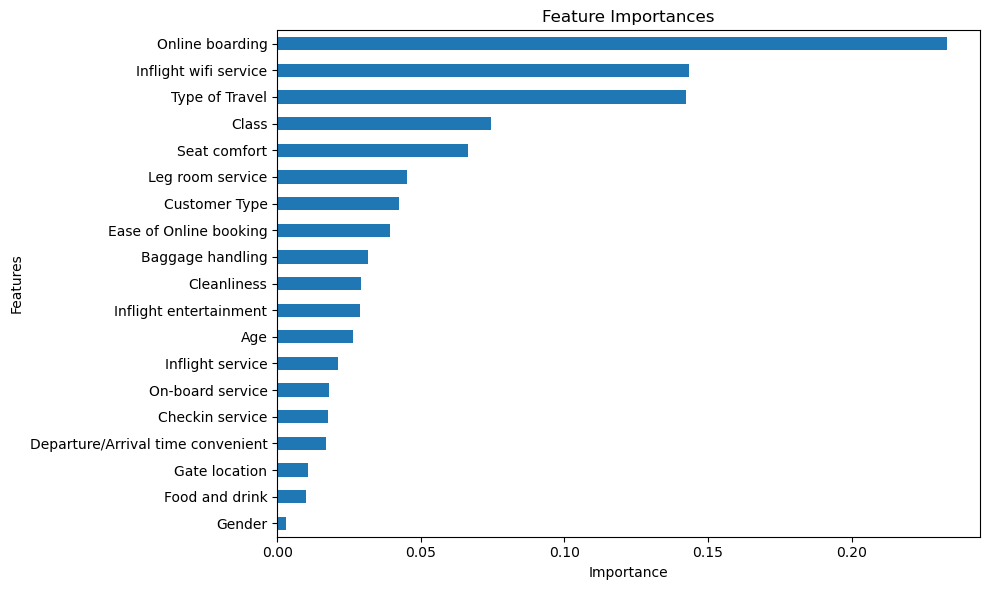

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tkinter as tk
from tkinter import messagebox
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,auc,roc_curve,confusion_matrix
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from math import sqrt
from sklearn.feature_selection import f_classif

# Load the dataset (assuming it's in a CSV file named 'Airline Passenger Satisfaction cleaned.csv')
data = pd.read_csv('Airline Passenger Satisfaction cleaned.csv')


# Encoding categorical variables
#label_encoder = LabelEncoder()
#categorical_columns = [
#    'Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service',
#    'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location',
#    'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment',
#    'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service',
#    'Inflight service', 'Cleanliness'
#]

#for col in categorical_columns:
#    data[col] = label_encoder.fit_transform(data[col])

# Set Features and target variable
X = data.drop('satisfaction', axis=1)
y = data['satisfaction']

#Features Scalling using standardisation
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Random forest model
rf = RandomForestClassifier(n_estimators = 15, criterion = 'gini', min_samples_leaf=5, random_state = 0)
#train the model
rf.fit(X_train, y_train)

#apply to the test set
pred_rf = rf.predict(X_test)

#check the model accuracy
acc_rf = accuracy_score(y_test, pred_rf)
# Print the results
print(f"Best Model Accuracy for Random Forest : ", acc_rf)

# Classification report
report_rf = classification_report(y_test, pred_rf)

print("Classification Report for Random Forest :\n", report_rf)

# Relationship
# Convert X back to a DataFrame
X = pd.DataFrame(X, columns=data.drop('satisfaction', axis=1).columns)

# Create a DataFrame with feature names and their importance score
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

# Plotting feature importances as a vertical bar chart
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='barh')  # Change here to 'barh' for vertical bars
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.tight_layout()
plt.show()

# Prediction
def predict():
    try:
        # Get values from input fields
        gender = int(entry_gender.get())
        customer_type = int(entry_customer_type.get())
        age = float(entry_age.get())
        type_of_travel = int(entry_type_of_travel.get())
        classes = int(entry_class.get())
        inflight_wifi_service = int(entry_inflight_wifi_service.get())
        departure_arrival_time_convenient = int(entry_departure_arrival_time_convenient.get())
        ease_of_online_booking = int(entry_ease_of_online_booking.get())
        gate_location = int(entry_gate_location.get())
        food_and_drink = int(entry_food_and_drink.get())
        online_boarding = int(entry_online_boarding.get())
        seat_comfort = int(entry_seat_comfort.get())
        inflight_entertainment = int(entry_inflight_entertainment.get())
        on_board_service = int(entry_on_board_service.get())
        leg_room_service = int(entry_leg_room_service.get())
        baggage_handling = int(entry_baggage_handling.get())
        checkin_service = int(entry_checkin_service.get())
        inflight_service = int(entry_inflight_service.get())
        cleanliness = int(entry_cleanliness.get())
        
        # Make prediction using the Random forest model
        prediction = rf.predict([[
            gender, customer_type, age, type_of_travel, classes, inflight_wifi_service,
            departure_arrival_time_convenient, ease_of_online_booking, gate_location, food_and_drink,
            online_boarding, seat_comfort, inflight_entertainment, on_board_service, leg_room_service,
            baggage_handling, checkin_service, inflight_service, cleanliness
        ]])
        
        # Show the predicted satisfaction in a message box
        messagebox.showinfo("Prediction", f"The predicted satisfaction is: {prediction[0]}")
    except ValueError:
        messagebox.showerror("Error", "Please enter valid values.")

# Create the GUI window
root = tk.Tk()
root.title("Airline Passenger Satisfaction Predictor")

# Create labels and input fields for features
label_gender = tk.Label(root, text="Gender (0: Female, 1: Male):")
entry_gender = tk.Entry(root)
label_gender.grid(row=0, column=0, padx=5, pady=5)
entry_gender.grid(row=0, column=1, padx=5, pady=5)

label_customer_type = tk.Label(root, text="Customer Type (0: Loyal, 1: Disloyal):")
entry_customer_type = tk.Entry(root)
label_customer_type.grid(row=1, column=0, padx=5, pady=5)
entry_customer_type.grid(row=1, column=1, padx=5, pady=5)

label_age = tk.Label(root, text="Age:")
entry_age = tk.Entry(root)
label_age.grid(row=2, column=0, padx=5, pady=5)
entry_age.grid(row=2, column=1, padx=5, pady=5)

label_type_of_travel = tk.Label(root, text="Type of Travel (0: Business Travel, 1: Personal Travel):")
entry_type_of_travel = tk.Entry(root)
label_type_of_travel.grid(row=3, column=0, padx=5, pady=5)
entry_type_of_travel.grid(row=3, column=1, padx=5, pady=5)

label_class = tk.Label(root, text="Class (0: Business, 1: Eco, 2: Eco Plus):")
entry_class = tk.Entry(root)
label_class.grid(row=4, column=0, padx=5, pady=5)
entry_class.grid(row=4, column=1, padx=5, pady=5)

label_inflight_wifi_service = tk.Label(root, text="Inflight wifi service (Rating 0 to 5) : ")
entry_inflight_wifi_service = tk.Entry(root)
label_inflight_wifi_service.grid(row=6, column=0, padx=5, pady=5)
entry_inflight_wifi_service.grid(row=6, column=1, padx=5, pady=5)

label_departure_arrival_time_convenient = tk.Label(root, text="Departure/Arrival time convenient (Rating 0 to 5) : ")
entry_departure_arrival_time_convenient = tk.Entry(root)
label_departure_arrival_time_convenient.grid(row=7, column=0, padx=5, pady=5)
entry_departure_arrival_time_convenient.grid(row=7, column=1, padx=5, pady=5)

label_ease_of_online_booking = tk.Label(root, text="Ease of Online booking (Rating 0 to 5) : ")
entry_ease_of_online_booking = tk.Entry(root)
label_ease_of_online_booking.grid(row=8, column=0, padx=5, pady=5)
entry_ease_of_online_booking.grid(row=8, column=1, padx=5, pady=5)

label_gate_location = tk.Label(root, text="Gate location (Rating 0 to 5) : ")
entry_gate_location = tk.Entry(root)
label_gate_location.grid(row=9, column=0, padx=5, pady=5)
entry_gate_location.grid(row=9, column=1, padx=5, pady=5)

label_food_and_drink = tk.Label(root, text="Food and drink (Rating 0 to 5) : ")
entry_food_and_drink = tk.Entry(root)
label_food_and_drink.grid(row=10, column=0, padx=5, pady=5)
entry_food_and_drink.grid(row=10, column=1, padx=5, pady=5)

label_online_boarding = tk.Label(root, text="Online boarding (Rating 0 to 5) : ")
entry_online_boarding = tk.Entry(root)
label_online_boarding.grid(row=11, column=0, padx=5, pady=5)
entry_online_boarding.grid(row=11, column=1, padx=5, pady=5)

label_seat_comfort = tk.Label(root, text="Seat comfort (Rating 0 to 5) : ")
entry_seat_comfort = tk.Entry(root)
label_seat_comfort.grid(row=12, column=0, padx=5, pady=5)
entry_seat_comfort.grid(row=12, column=1, padx=5, pady=5)

label_inflight_entertainment= tk.Label(root, text="Inflight entertainment (Rating 0 to 5) : ")
entry_inflight_entertainment = tk.Entry(root)
label_inflight_entertainment.grid(row=13, column=0, padx=5, pady=5)
entry_inflight_entertainment.grid(row=13, column=1, padx=5, pady=5)

label_on_board_service = tk.Label(root, text="On-board service (Rating 0 to 5) : ")
entry_on_board_service = tk.Entry(root)
label_on_board_service.grid(row=14, column=0, padx=5, pady=5)
entry_on_board_service.grid(row=14, column=1, padx=5, pady=5)

label_leg_room_service = tk.Label(root, text="Leg room service (Rating 0 to 5) : ")
entry_leg_room_service = tk.Entry(root)
label_leg_room_service.grid(row=15, column=0, padx=5, pady=5)
entry_leg_room_service.grid(row=15, column=1, padx=5, pady=5)

label_baggage_handling = tk.Label(root, text="Baggage handling (Rating 0 to 5) : ")
entry_baggage_handling = tk.Entry(root)
label_baggage_handling.grid(row=16, column=0, padx=5, pady=5)
entry_baggage_handling.grid(row=16, column=1, padx=5, pady=5)

label_checkin_service = tk.Label(root, text="Checkin service (Rating 0 to 5) : ")
entry_checkin_service = tk.Entry(root)  
label_checkin_service.grid(row=17, column=0, padx=5, pady=5)
entry_checkin_service.grid(row=17, column=1, padx=5, pady=5)

label_inflight_service  = tk.Label(root, text="Inflight service (Rating 0 to 5) : ")
entry_inflight_service  = tk.Entry(root)
label_inflight_service.grid(row=18, column=0, padx=5, pady=5)
entry_inflight_service.grid(row=18, column=1, padx=5, pady=5)

label_cleanliness = tk.Label(root, text="Cleanliness (Rating 0 to 5) : ")
entry_cleanliness = tk.Entry(root)
label_cleanliness.grid(row=19, column=0, padx=5, pady=5)
entry_cleanliness.grid(row=19, column=1, padx=5, pady=5)

# Button to trigger prediction
predict_button = tk.Button(root, text="Predict", command=predict)
predict_button.grid(columnspan=2, pady=10)

# Run the GUI
root.mainloop()

# KNN

Best Model Accuracy for KNN:  0.9397905759162304
Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     14568
           1       0.96      0.91      0.93     11408

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



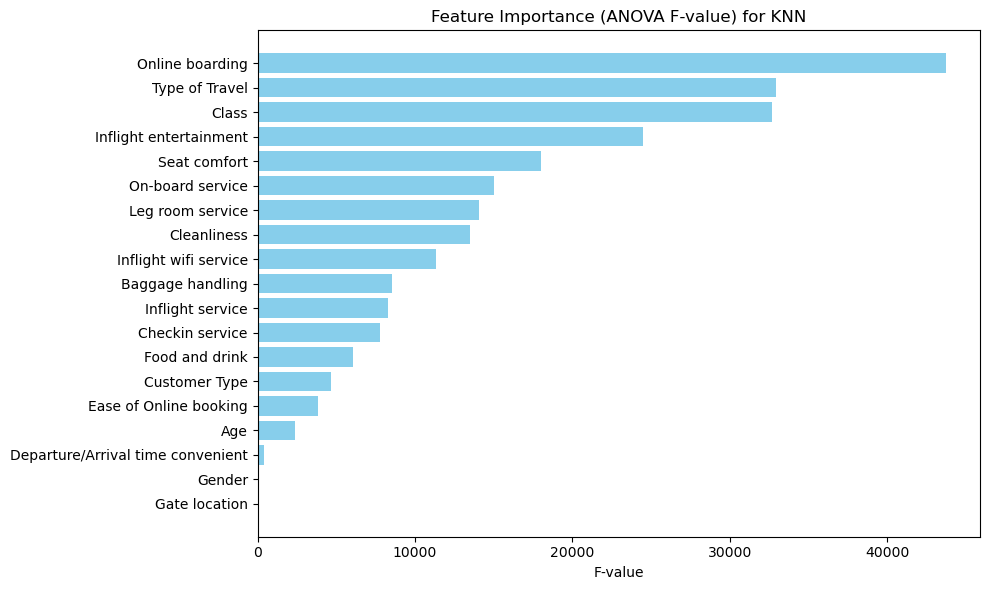

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tkinter as tk
from tkinter import messagebox
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,auc,roc_curve,confusion_matrix
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from math import sqrt
from sklearn.feature_selection import f_classif

# Load the dataset (assuming it's in a CSV file named 'Airline Passenger Satisfaction cleaned.csv')
data = pd.read_csv('Airline Passenger Satisfaction cleaned.csv')


# Encoding categorical variables
#label_encoder = LabelEncoder()
#categorical_columns = [
#    'Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service',
#    'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location',
#    'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment',
#    'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service',
#    'Inflight service', 'Cleanliness'
#]

#for col in categorical_columns:
#    data[col] = label_encoder.fit_transform(data[col])

# Set Features and target variable
X = data.drop('satisfaction', axis=1)
y = data['satisfaction']

#Features Scalling using standardisation
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# KNN model
#setting hyperparameter (k=0.5)
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
#train the model
knn.fit(X_train, y_train)

#apply to the test set
pred_knn = knn.predict(X_test)

#check the model accuracy
acc_knn = accuracy_score(y_test, pred_knn)
# Print the results
print(f"Best Model Accuracy for KNN: ", acc_knn)


# Classification report
report_knn = classification_report(y_test, pred_knn)

print("Classification Report for KNN:\n", report_knn)

# Relationship
# Convert X back to a DataFrame
X = pd.DataFrame(X, columns=data.drop('satisfaction', axis=1).columns)

# Calculate ANOVA F-value for feature importance
f_values, p_values = f_classif(X, y)

# Create a DataFrame with feature names and their F-values
feature_importance = pd.DataFrame({'Feature': X.columns, 'F-value': f_values})
feature_importance = feature_importance.sort_values(by='F-value', ascending=False)

# Plot the feature importance in a bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['F-value'], color='skyblue')
plt.xlabel('F-value')
plt.title('Feature Importance (ANOVA F-value) for KNN')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.tight_layout()
plt.show()

# Prediction
def predict():
    try:
        # Get values from input fields
        gender = int(entry_gender.get())
        customer_type = int(entry_customer_type.get())
        age = float(entry_age.get())
        type_of_travel = int(entry_type_of_travel.get())
        classes = int(entry_class.get())
        inflight_wifi_service = int(entry_inflight_wifi_service.get())
        departure_arrival_time_convenient = int(entry_departure_arrival_time_convenient.get())
        ease_of_online_booking = int(entry_ease_of_online_booking.get())
        gate_location = int(entry_gate_location.get())
        food_and_drink = int(entry_food_and_drink.get())
        online_boarding = int(entry_online_boarding.get())
        seat_comfort = int(entry_seat_comfort.get())
        inflight_entertainment = int(entry_inflight_entertainment.get())
        on_board_service = int(entry_on_board_service.get())
        leg_room_service = int(entry_leg_room_service.get())
        baggage_handling = int(entry_baggage_handling.get())
        checkin_service = int(entry_checkin_service.get())
        inflight_service = int(entry_inflight_service.get())
        cleanliness = int(entry_cleanliness.get())
        
        # Make prediction using the KNN model
        prediction = knn.predict([[
            gender, customer_type, age, type_of_travel, classes, inflight_wifi_service,
            departure_arrival_time_convenient, ease_of_online_booking, gate_location, food_and_drink,
            online_boarding, seat_comfort, inflight_entertainment, on_board_service, leg_room_service,
            baggage_handling, checkin_service, inflight_service, cleanliness
        ]])
        
        # Show the predicted satisfaction in a message box
        messagebox.showinfo("Prediction", f"The predicted satisfaction is: {prediction[0]}")
    except ValueError:
        messagebox.showerror("Error", "Please enter valid values.")

# Create the GUI window
root = tk.Tk()
root.title("Airline Passenger Satisfaction Predictor")

# Create labels and input fields for features
label_gender = tk.Label(root, text="Gender (0: Female, 1: Male):")
entry_gender = tk.Entry(root)
label_gender.grid(row=0, column=0, padx=5, pady=5)
entry_gender.grid(row=0, column=1, padx=5, pady=5)

label_customer_type = tk.Label(root, text="Customer Type (0: Loyal, 1: Disloyal):")
entry_customer_type = tk.Entry(root)
label_customer_type.grid(row=1, column=0, padx=5, pady=5)
entry_customer_type.grid(row=1, column=1, padx=5, pady=5)

label_age = tk.Label(root, text="Age:")
entry_age = tk.Entry(root)
label_age.grid(row=2, column=0, padx=5, pady=5)
entry_age.grid(row=2, column=1, padx=5, pady=5)

label_type_of_travel = tk.Label(root, text="Type of Travel (0: Business Travel, 1: Personal Travel):")
entry_type_of_travel = tk.Entry(root)
label_type_of_travel.grid(row=3, column=0, padx=5, pady=5)
entry_type_of_travel.grid(row=3, column=1, padx=5, pady=5)

label_class = tk.Label(root, text="Class (0: Business, 1: Eco, 2: Eco Plus):")
entry_class = tk.Entry(root)
label_class.grid(row=4, column=0, padx=5, pady=5)
entry_class.grid(row=4, column=1, padx=5, pady=5)

label_inflight_wifi_service = tk.Label(root, text="Inflight wifi service (Rating 0 to 5) : ")
entry_inflight_wifi_service = tk.Entry(root)
label_inflight_wifi_service.grid(row=6, column=0, padx=5, pady=5)
entry_inflight_wifi_service.grid(row=6, column=1, padx=5, pady=5)

label_departure_arrival_time_convenient = tk.Label(root, text="Departure/Arrival time convenient (Rating 0 to 5) : ")
entry_departure_arrival_time_convenient = tk.Entry(root)
label_departure_arrival_time_convenient.grid(row=7, column=0, padx=5, pady=5)
entry_departure_arrival_time_convenient.grid(row=7, column=1, padx=5, pady=5)

label_ease_of_online_booking = tk.Label(root, text="Ease of Online booking (Rating 0 to 5) : ")
entry_ease_of_online_booking = tk.Entry(root)
label_ease_of_online_booking.grid(row=8, column=0, padx=5, pady=5)
entry_ease_of_online_booking.grid(row=8, column=1, padx=5, pady=5)

label_gate_location = tk.Label(root, text="Gate location (Rating 0 to 5) : ")
entry_gate_location = tk.Entry(root)
label_gate_location.grid(row=9, column=0, padx=5, pady=5)
entry_gate_location.grid(row=9, column=1, padx=5, pady=5)

label_food_and_drink = tk.Label(root, text="Food and drink (Rating 0 to 5) : ")
entry_food_and_drink = tk.Entry(root)
label_food_and_drink.grid(row=10, column=0, padx=5, pady=5)
entry_food_and_drink.grid(row=10, column=1, padx=5, pady=5)

label_online_boarding = tk.Label(root, text="Online boarding (Rating 0 to 5) : ")
entry_online_boarding = tk.Entry(root)
label_online_boarding.grid(row=11, column=0, padx=5, pady=5)
entry_online_boarding.grid(row=11, column=1, padx=5, pady=5)

label_seat_comfort = tk.Label(root, text="Seat comfort (Rating 0 to 5) : ")
entry_seat_comfort = tk.Entry(root)
label_seat_comfort.grid(row=12, column=0, padx=5, pady=5)
entry_seat_comfort.grid(row=12, column=1, padx=5, pady=5)

label_inflight_entertainment= tk.Label(root, text="Inflight entertainment (Rating 0 to 5) : ")
entry_inflight_entertainment = tk.Entry(root)
label_inflight_entertainment.grid(row=13, column=0, padx=5, pady=5)
entry_inflight_entertainment.grid(row=13, column=1, padx=5, pady=5)

label_on_board_service = tk.Label(root, text="On-board service (Rating 0 to 5) : ")
entry_on_board_service = tk.Entry(root)
label_on_board_service.grid(row=14, column=0, padx=5, pady=5)
entry_on_board_service.grid(row=14, column=1, padx=5, pady=5)

label_leg_room_service = tk.Label(root, text="Leg room service (Rating 0 to 5) : ")
entry_leg_room_service = tk.Entry(root)
label_leg_room_service.grid(row=15, column=0, padx=5, pady=5)
entry_leg_room_service.grid(row=15, column=1, padx=5, pady=5)

label_baggage_handling = tk.Label(root, text="Baggage handling (Rating 0 to 5) : ")
entry_baggage_handling = tk.Entry(root)
label_baggage_handling.grid(row=16, column=0, padx=5, pady=5)
entry_baggage_handling.grid(row=16, column=1, padx=5, pady=5)

label_checkin_service = tk.Label(root, text="Checkin service (Rating 0 to 5) : ")
entry_checkin_service = tk.Entry(root)  
label_checkin_service.grid(row=17, column=0, padx=5, pady=5)
entry_checkin_service.grid(row=17, column=1, padx=5, pady=5)

label_inflight_service  = tk.Label(root, text="Inflight service (Rating 0 to 5) : ")
entry_inflight_service  = tk.Entry(root)
label_inflight_service.grid(row=18, column=0, padx=5, pady=5)
entry_inflight_service.grid(row=18, column=1, padx=5, pady=5)

label_cleanliness = tk.Label(root, text="Cleanliness (Rating 0 to 5) : ")
entry_cleanliness = tk.Entry(root)
label_cleanliness.grid(row=19, column=0, padx=5, pady=5)
entry_cleanliness.grid(row=19, column=1, padx=5, pady=5)

# Button to trigger prediction
predict_button = tk.Button(root, text="Predict", command=predict)
predict_button.grid(columnspan=2, pady=10)

# Run the GUI
root.mainloop()